In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt

# Code `get_data()`

## Create _draft code_ in the notebook

In [2]:
# Where am I?
os.getcwd()

'/Users/yusuke/code/lewagon/04-Decision-Science/01-Project-Setup/data-olist_data_metric'

In [3]:
import os
import pandas as pd

# Build relative path to csv folder 
csv_path = '/home/vincent/code/vtmoreau/04-Decision-Sicence/01-Project-Setup/data-context-and-setup/data/csv' # Bad practice!
csv_path = '../data-context-and-setup/data/csv' # Mac OS / Ubuntu only
csv_path = '..\\data-context-and-setup\\data\\csv' # Windows only
csv_path = os.path.join('..', 'data-context-and-setup','data','csv') # Robust to Linux/OS/Windows variations

csv_path

'../data-context-and-setup/data/csv'

In [4]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [5]:
#.strip() or .replace()
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [6]:
# How to iterate over two list simulatenously ? 
# Let's discover how zip works :

l1 = ['a','b','c']
l2 = [1,2,3]
list(zip(l1,l2))

[('a', 1), ('b', 2), ('c', 3)]

In [7]:
# Create the dictionary

data = {}

for (k, f) in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))

data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
data

{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul

## Transfer logic to `olist/data.py` 🐍

When you call a function that you will name `get_data` from `olist/data.py`, it should return the dictionary `data`:with key/value pairs `"name of the dataset":"dataset.csv"`

```python
from olist.data import Olist
Olist().get_data()
```
- Take your time to understand what happens when calling `Olist().get_data()`
- Your method `get_data()` needs to be callable from various places (e.g your Terminal, this notebook, another notebook located elsewhere, etc...)
- You can't use a relative path this time as the current working directory `os.getcwd()` depends on where you run the code in the first place


In [16]:
from olist.data import Olist
data = Olist().get_data()
type(data)

dict

In [17]:
# Test your code
from olist.data import Olist
Olist().get_data().keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

# Let's build a business metric: `Weekly Sales` 📈

<img src="https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/01-Project-Setup/olist_schema.png" width=1000>

**Goal**: Plot the weekly sum of `payment_value` for delivered orders

1️⃣ **Step 1**: Pseudo code your process in English below before actually coding

> YOUR ANSWER HERE
1. Create DF that calculates the total payment value per week

1. Join tables orders and order_payments
2. Group by weekly bins order purchased timestamp
3. Sum the payment_value
4. Plot

2️⃣ **Step 2**: Code your logic

In [19]:
orders = data["orders"]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
order_payments = data["order_payments"]
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [45]:
order_w_payments = pd.merge(orders, order_payments, on="order_id", how="inner")
order_w_payments

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


In [23]:
order_w_payments["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [46]:
delivered_order_payments = order_w_payments[order_w_payments["order_status"] == "delivered"]
delivered_order_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


⌛️ Do not forget to handle `datetime` properly.

In [31]:
delivered_order_payments.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
dtype: object

In [47]:
delivered_order_payments["order_purchase_timestamp"] = pd.to_datetime(delivered_order_payments["order_purchase_timestamp"])
delivered_order_payments.dtypes

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_90049/1439399465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order_payments["order_purchase_timestamp"] = pd.to_datetime(delivered_order_payments["order_purchase_timestamp"])


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
dtype: object

👉 Set the `order_purchase_timestamp` as the index

In [48]:
delivered_order_payments = delivered_order_payments[["payment_value", "order_purchase_timestamp", "order_id"]]
delivered_order_payments.head()

,payment_value,order_purchase_timestamp,order_id
0,18.12,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
1,2.00,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
2,18.59,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
3,141.46,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451
4,179.12,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d


In [38]:
delivered_order_payments["order_purchase_timestamp"].dt.isocalendar().week

0         40
1         40
2         40
3         30
4         32
          ..
103881    10
103882     6
103883    34
103884     2
103885    10
Name: week, Length: 100756, dtype: UInt32

In [52]:
delivered_order_payments.set_index("order_purchase_timestamp", inplace=True)
delivered_order_payments.head()

,payment_value,order_id
order_purchase_timestamp,,
2017-10-02 10:56:33,18.12,e481f51cbdc54678b7cc49136f2d6af7
2017-10-02 10:56:33,2.00,e481f51cbdc54678b7cc49136f2d6af7
2017-10-02 10:56:33,18.59,e481f51cbdc54678b7cc49136f2d6af7
2018-07-24 20:41:37,141.46,53cdb2fc8bc7dce0b6741e2150273451
2018-08-08 08:38:49,179.12,47770eb9100c2d0c44946d9cf07ec65d


👉 You can now resample this dataset to compute metrics on a weekly basis.

In [42]:
delivered_order_payments.resample("W").sum()

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_90049/3724999111.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivered_order_payments.resample("W").sum()


,payment_value
order_purchase_timestamp,
2016-10-09,42669.98
2016-10-16,3896.73
2016-10-23,0.00
2016-10-30,0.00
2016-11-06,0.00
...,...
2018-08-05,320204.74
2018-08-12,318700.65
2018-08-19,285766.68


In [53]:
delivered_order_payments.resample("M").sum()

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_90049/2075937702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivered_order_payments.resample("M").sum()


,payment_value
order_purchase_timestamp,
2016-10-31,46566.71
2016-11-30,0.00
2016-12-31,19.62
2017-01-31,127545.67
2017-02-28,271298.65
2017-03-31,414369.39
2017-04-30,390952.18
2017-05-31,567066.73
2017-06-30,490225.60


In [50]:
import datetime

delivered_order_payments["order_purchase_timestamp"].dt.strftime("%Y-%U")

0         2017-40
1         2017-40
2         2017-40
3         2018-29
4         2018-31
           ...   
103881    2017-10
103882    2018-05
103883    2017-35
103884    2018-01
103885    2018-09
Name: order_purchase_timestamp, Length: 100756, dtype: object

📈 Plot the weekly payment values to get a big picture of Olist's revenues.

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_90049/1802418435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivered_order_payments.resample("W").sum().plot()


<AxesSubplot:xlabel='order_purchase_timestamp'>

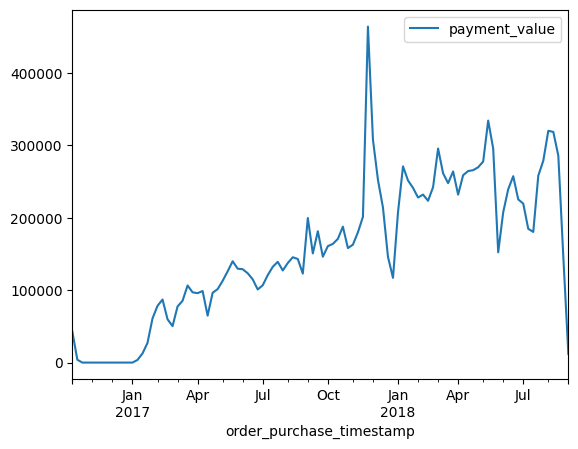

In [55]:
delivered_order_payments.resample("W").sum().plot()